<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/ejercicio%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
Genera al menos dos modelos de clustering utilizando el conjunto de datos
pokemon.csv y comenta el comportamiento observado. ¿Cuál es el número óptimo de clusters?
¿Están claramente diferenciados?

In [3]:
pip install pandas scikit-learn

In [4]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# importar la base de datos pokemon
poke = pd.read_csv('pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
poke.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Para hacer el clustering, en este caso nos quedaremos con las variables cuantitativas en relación a los puntos de combate que tienen los pokemon.
Nuestro objetivo será ver si los pokemon se agrupan en conjuntos en los que unos sean más fuertes que otros, que destaquen en alguna característica o simplemente si se agrupan de alguna manera.

In [7]:
# Seleccionar características relevantes para clustering
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
X = poke[features]

In [8]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Para determinar el número óptimo de clusters usaremos el metodo del codo.

In [9]:
# Método del codo para determinar el número óptimo de clusters (K-means)
wcss = []  # Within-Cluster-Sum-of-Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

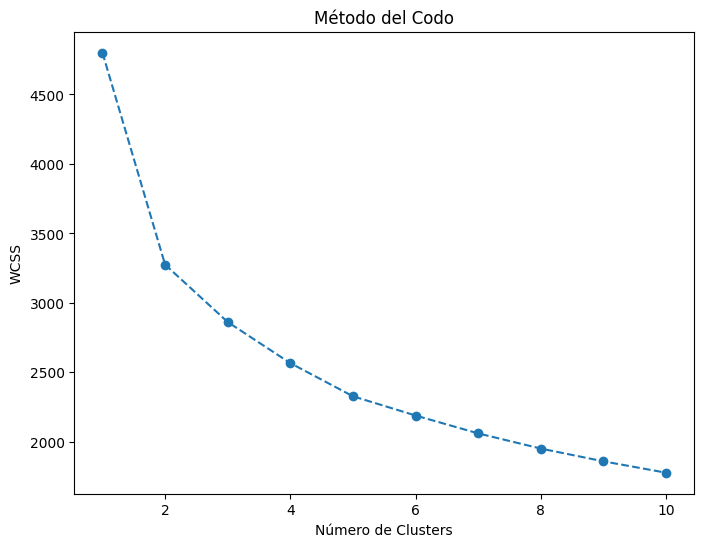

In [10]:
# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Basado en el método del codo, elijo un número óptimo de clusters
num_clusters_optimo = 2

El primero de los dos modelos de clustering será el de K-Means. El algoritmo K-Means busca minimizar la varianza intra-cluster, es decir, trata de hacer que los puntos dentro de cada cluster sean lo más similares posible. Sin embargo, la calidad de los clusters obtenidos puede depender de la elección inicial de los centroides, y el algoritmo puede converger a mínimos locales (técnicas como K-Means++ para mejorar la inicialización de centroides)

In [38]:
# K-means clustering
kmeans = KMeans(n_clusters=num_clusters_optimo, init='k-means++', random_state=42)
poke['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El segundo modelo de clustering que realizaremos será el clustering jerárquico (aglomerativo jerárquico). El método de Clustering Jerárquico Aglomerativo es una técnica que agrupa datos de manera jerárquica, es decir, organiza los datos en una estructura de árbol o dendrograma. A diferencia del K-Means, que requiere especificar el número de clusters de antemano, el método jerárquico no requiere un número predeterminado de clusters. Al final del proceso, se obtiene un dendrograma que muestra cómo se agruparon los datos en diferentes niveles de similitud. El número de clusters será el punto donde se corta el dendrograma.

In [39]:
# Agglomerative Hierarchical Clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters_optimo)
poke['Agg_Cluster'] = agg_cluster.fit_predict(X_scaled)

Veremos como se comportan los variables Ataque, Defensa, Ataque Especial y Defensa Especial. Tomaremos como número óptimo de clusters 2.

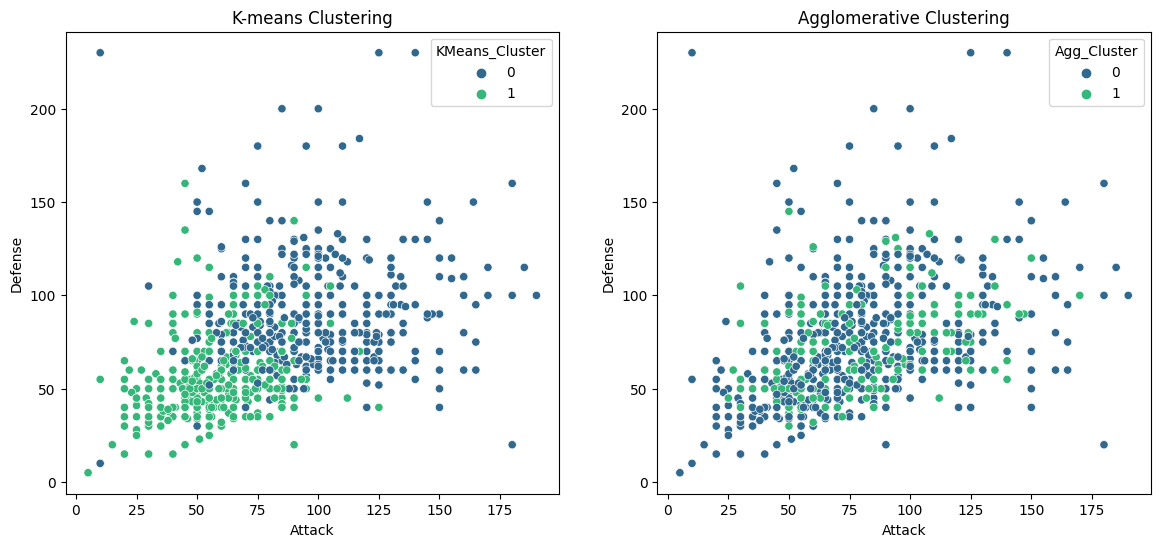

In [37]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Attack', y='Defense', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Attack', y='Defense', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

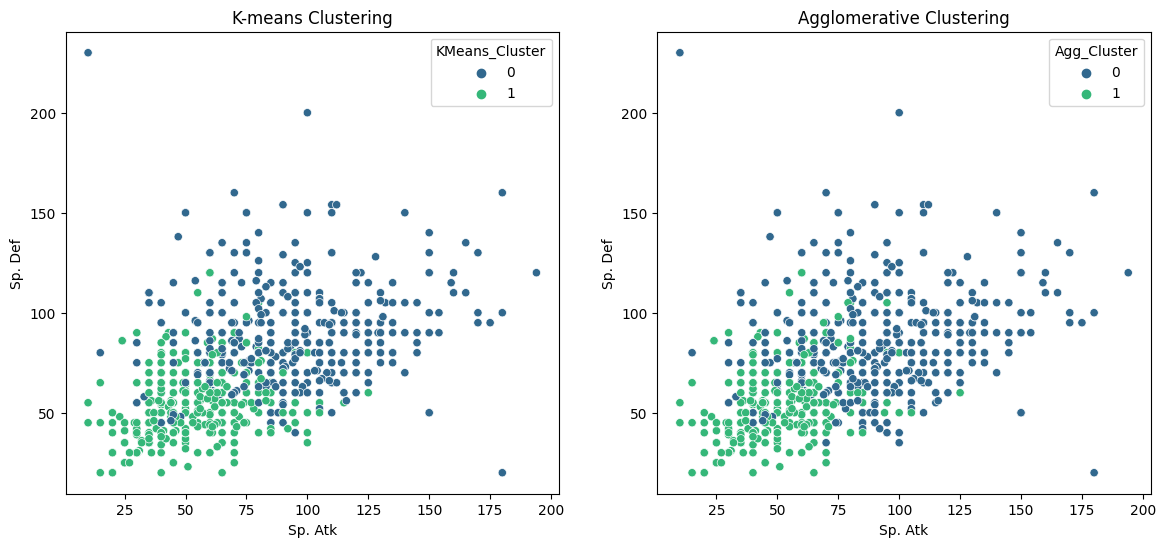

In [15]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Sp. Atk', y='Sp. Def', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Sp. Atk', y='Sp. Def', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

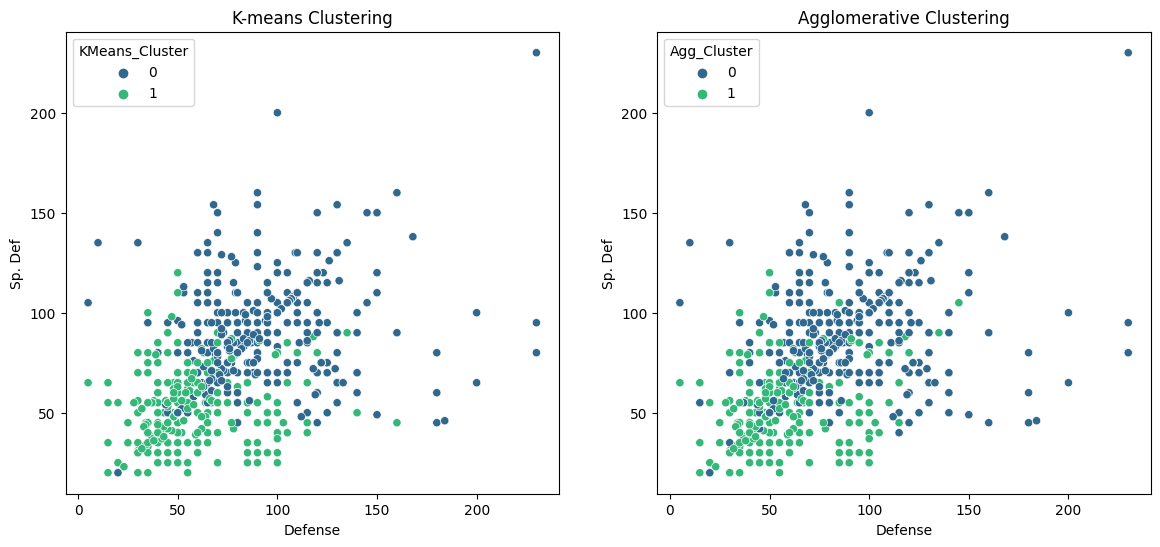

In [17]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Defense', y='Sp. Def', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Defense', y='Sp. Def', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

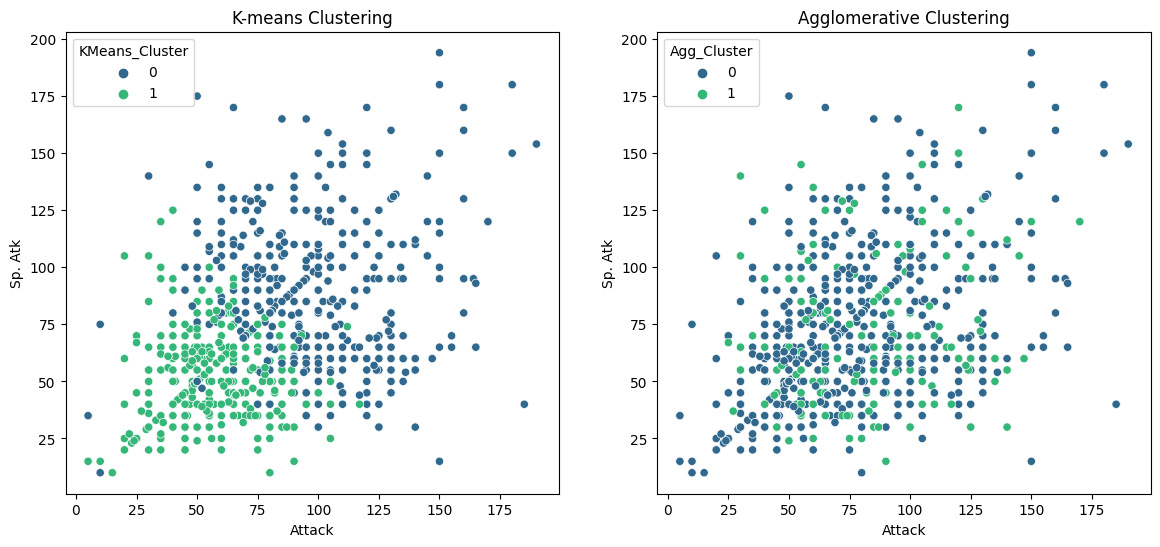

In [40]:
# Visualizar los resultados de clustering
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Attack', y='Sp. Atk', hue='KMeans_Cluster', data=poke, palette='viridis')
plt.title('K-means Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Attack', y='Sp. Atk', hue='Agg_Cluster', data=poke, palette='viridis')
plt.title('Agglomerative Clustering')

plt.show()

Como primera toma de contacto podemos ver que las diversas combinaciones de variables presentan un comportamiento o agrupación similar. En primer lugar, un cluster en la zona de abajo a la izquierda del gráfico que comprende valores bajos de ambas características, mientras que por otro lado, el segundo cluster estaría formado por los pokemon que presentan ambas o al menos una de las dos características con valores por encima de la mitad de cada eje del gráfico.


Viendo los gráficos, en el clustering K-Means los dos clusters parecen bien identificables, sin embargo en el clustering aglomerativo jerarárquico los clusters son bien identificables en algunos casos y mal en otros (Ataque/Ataque Especial y Ataque/Defensa son más difusos). Por tanto, el clustering de K-Means parece dar mejores resultados.

Usando el método K-Means, vamos a analizar como se comportan los clusters si cambiamos su número óptimo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

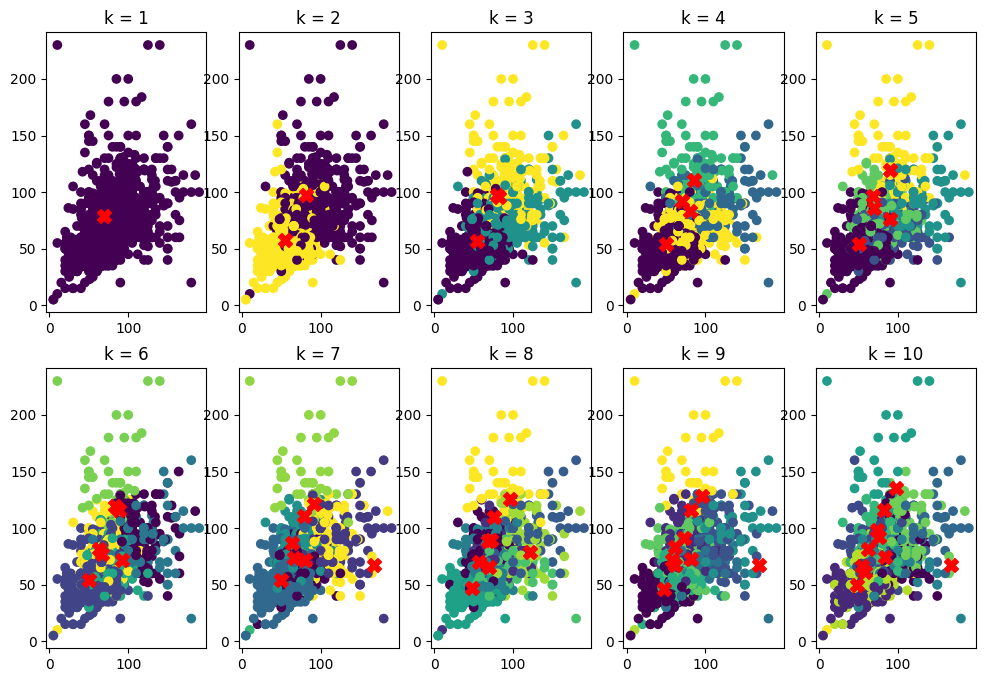

In [41]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Attack"],X['Defense'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

En el caso Ataque/Defensa vemos como el número óptimo de clusters nos hace dos grupos bien diferenciados que podemos catalogar como pokemon débiles en amarillo (bajos valores de ambas variables) y pokemon fuertes en morado (con valores altos). Si cambiamos el número óptimo de clusters a 3, el grupo de pokemon débiles sigue siendo el mismo pero el de pokemon fuertes se divide en pokemon con buen ataque y pokemon con buena defensa. Si cambiamos el número de clusters a 5, podemos encontrar un nuevo grupo (en verde claro) que podríamos catalogar como pokemon equilibrados, los cuales tienen puntuaciones de ataque y defensa ubicadas en la mitad del gráfico.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

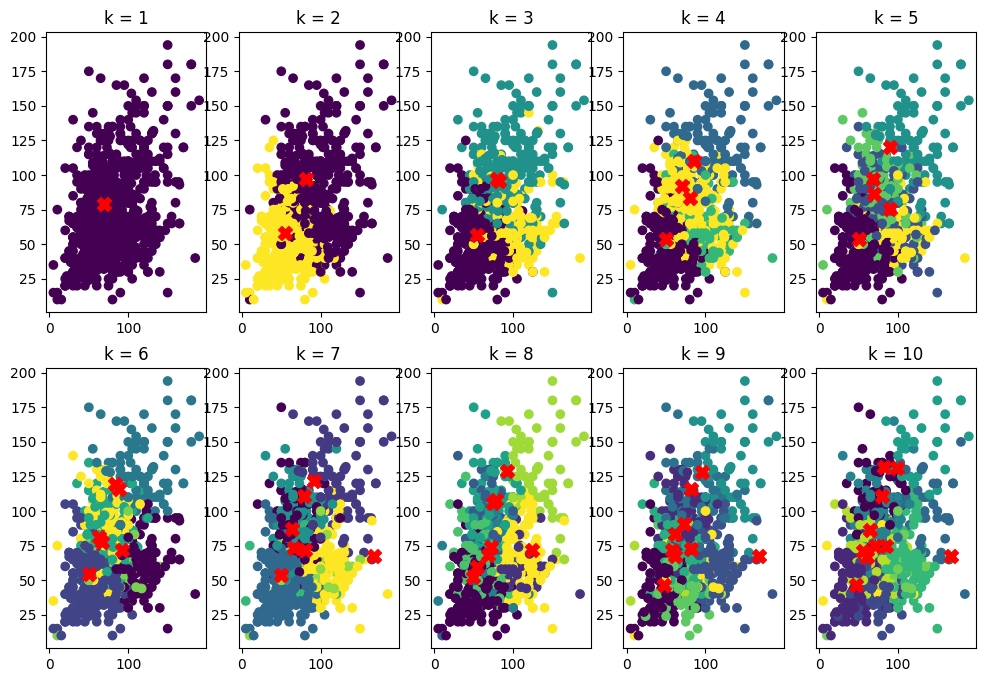

In [20]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Attack"],X['Sp. Atk'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

En el caso del Ataque/Ataque Especial, identificamos bien los dos clusters iniciales, pero cuando cambiamos el número a 3 vemos como nuevamente vuelve a haber tres grupos de pokemon débiles, pokemon con mejor ataque y pokemon con mejor ataque especial, si bien podemos destacar que no existe ningun clusters que podamos considerar como "pokemon muy fuertes" con altos valores en ambas variables (podríamos pero ya tras hacer muchos clusters donde van siendo cada vez más pequeños, ejemplo en el 7 se ven una zona diferenciada en la esquina superior derechas)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

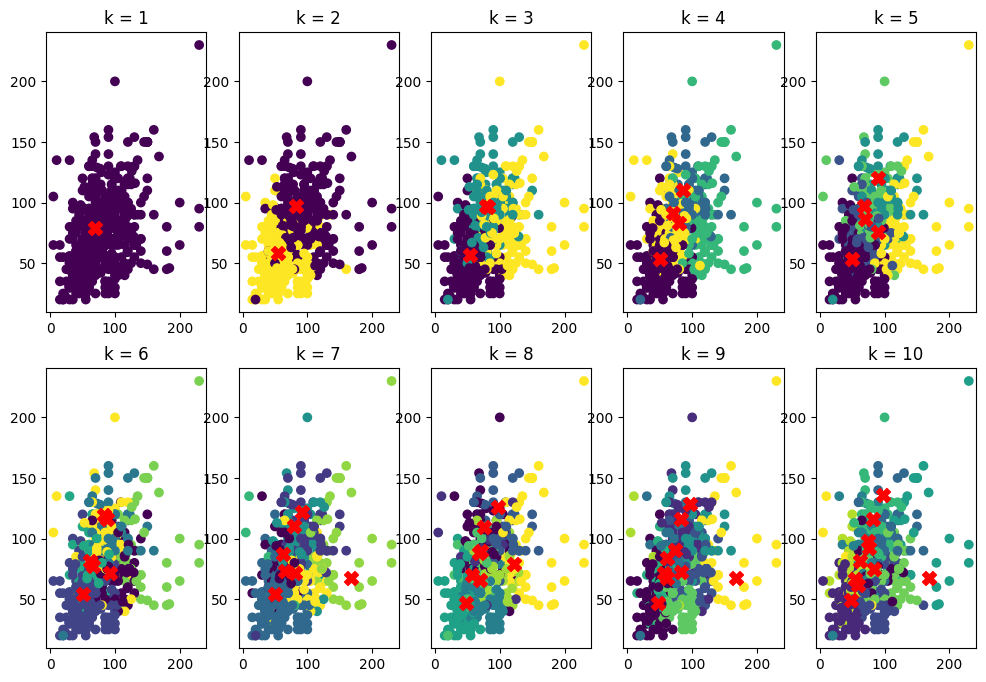

In [42]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Defense"],X['Sp. Def'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

Lo que más destaca de estos clusters Defensa/Defensa Especial no es la formación de los mismos ya que seguimos teniendo grupos muy identificables hasta el k=3, sino que los valores de estas dos variables son algo menores que en el resto de comparaciones, es decir, los puntos están más próximos al origen, por lo que podríamos decir que en general, los pokemon tienen más puntos en sus estadísticas ofensivas que defensivas.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

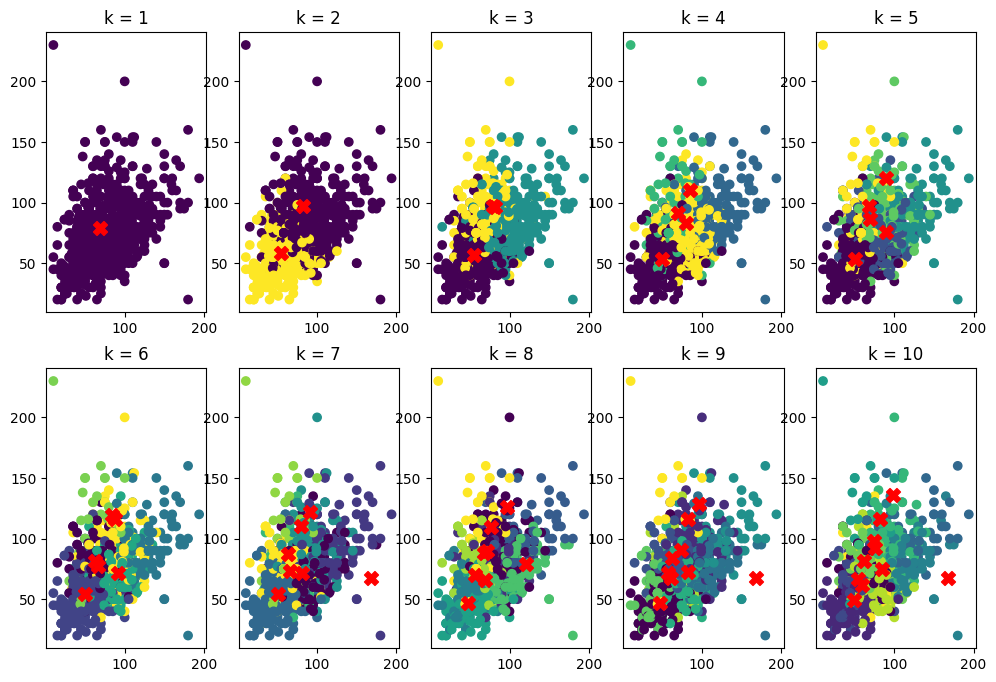

In [43]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(X)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(X["Sp. Atk"],X['Sp. Def'], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

Caso Ataque Especial/Defensa Especial sucede lo mismo que los anteriores ejemplos respecto al número de clusters. También podemos decir que los valores se encuentran más próximos al origen que en la comparativa Ataque/Defensa, por lo que podríamos decir que en los pokemon suelen tener mejores características de tipo físico que de tipo especial.

Una vez realizados los diferentes clusters podemos concluir en que podemos agrupar a los pokemon en dos clusters (fuertes y débiles). Si ampliamos el número de clusters a 3 en el modelo de K-Means podemos decir que existen los pokemon débiles y los que son fuertes en una de las 2 estadísticas.

Con la conclusión obtenida nos pueden surgir nuevas preguntas y la que más llama la atención es "no hay ningún grupo de pokemon que sea muy fuerte?", es decir, que tenga en las dos estadísiticas del gráfico valores muy altos.
Podemos pensar que este grupo de pokemon muy fuertes se puede identificar con los pokemon legendarios y que no son suficientes para tener su propio grupo en el clustering.

<ipython-input-71-a40c25ddd537>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-71-a40c25ddd537>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


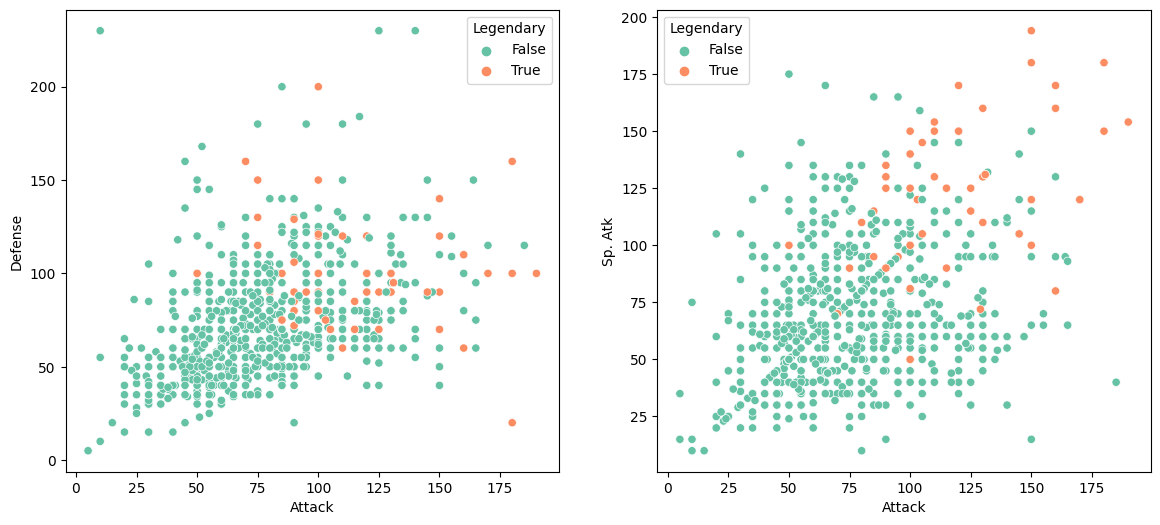

In [71]:
plt.subplots(2, 2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Attack', y='Defense',hue=poke['Legendary'], data=poke, palette='Set2')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Attack', y='Sp. Atk',hue=poke['Legendary'], data=poke, palette='Set2')

plt.show()

<ipython-input-72-e048bc25c71f>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
<ipython-input-72-e048bc25c71f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


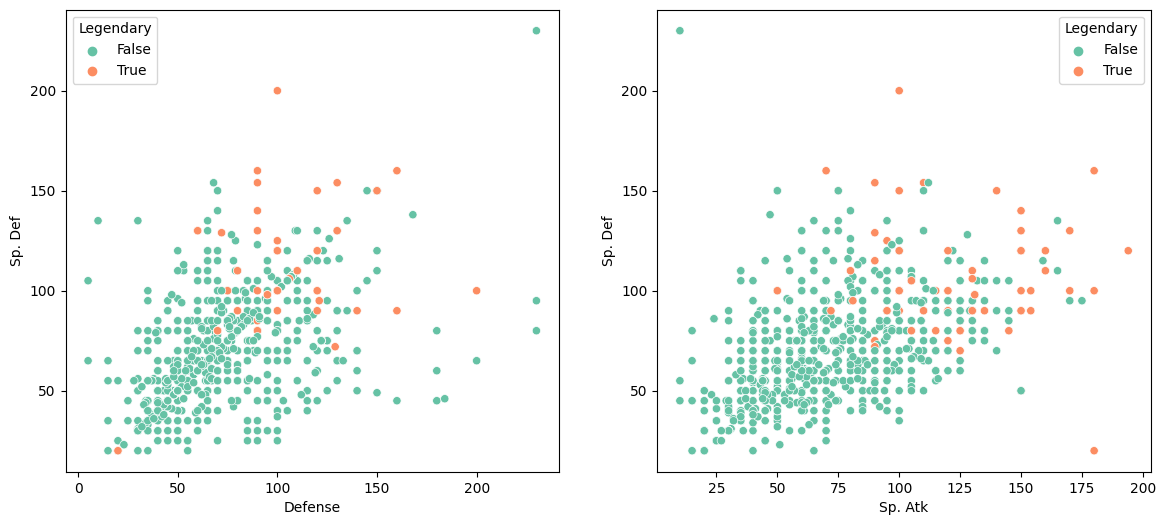

In [72]:
plt.subplots(2, 2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Defense', y='Sp. Def',hue=poke['Legendary'], data=poke, palette='Set2')
plt.subplot(1, 2, 2)
sns.scatterplot(x='Sp. Atk', y='Sp. Def',hue=poke['Legendary'], data=poke, palette='Set2')

plt.show()

Nos quedaremos solo con los pokemon legendarios para ver donde se ubican en los gráficos y ver si de verdad se pueden considerar los más fuertes del juego. Como podemos ver en los gráficos, los pokemon legendarios suelen estar en la parte del diagrama de dispersión donde están los valores más altos.

Destacan los gráficos Ataque/Ataque Especial y Ataque Especial/Defensa Especial donde claramente los valores más altos en ambas los ocupan pokemon legendarios. En los otros dos gráficos también están ubicados en posiciones cercanas a los valores más altos aunque más cercanos a los pokemon no legendarios (es decir, no destacan de manera exagerada). De esta manera podemos afirmar que los pokemon legendarios son en general "muy fuertes", ya que suelen presentar valores altas de todas las estadísitcas.

La ausencia de un grupo de pokemon "muy fuertes" en el análisis clustering anterior se podrían justificar en que los pokemon legendarios, que son los que en su mayoria formarían ese grupo, son pocos respecto a los pokemon no legendarios y por tanto no hay suficientes para que formen su propia agrupación.